# Hotel Reservation Predicition ~ Notebook Testing

Hotel Reservation Prediction is a machine learning project that aims to predict whether a hotel reservation will be canceled or not based on various features of the reservation. This notebook is designed to test the functionality and performance of the model.

## Project Workflow

1. **Data Loading**: Load the dataset containing hotel reservation information.

2. **Data Preprocessing**: Clean the data, handle missing values, and encode categorical variables.

3. **Exploratory Data Analysis (EDA)**: Analyze the data to understand patterns and relationships between features.

4. **Feature Engineering**: Create new features that may improve model performance.

5. **Model Training**: Train various machine learning models on the training dataset.

6. **Model Evaluation**: Evaluate the models using appropriate metrics such as accuracy, precision, recall, and F1-score.

7. **Hyperparameter Tuning**: Optimize model parameters to improve performance.

8. **Final Model Selection**: Choose the best-performing model based on evaluation metrics.

9. **Prediction**: Use the final model to make predictions on new data.

## Problem Statement
Hotels face significant challenges due to last-minute cancellations and no-shows. This leads to:

- Revenue loss: Missed opportunities to fill rooms.

- Inventory mismanagement: Inability to optimize room allocation.

- Customer dissatisfaction: Overbooking or underutilization of resources.

**Objective:** Build a machine learning model that predicts whether a reservation will be **honored or canceled**, enabling hotels to make informed decisions in advance.

## Data Loading

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Loading the dataset

data = pd.read_csv('../dataset/hotel_reservations_data.csv') 
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Preprocessing

In [16]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [17]:
# Dropping irrelevant columns

data.drop(columns = ['Booking_ID'], inplace = True)
data.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [18]:
# Number of rows and columns

data.shape

(36275, 18)

In [19]:
# Checking the number of missing columns

data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [20]:
# Checking for duplicates

data.duplicated().sum()

10275

**As we are having enough datapoints, we can drop the duplicates**

In [21]:
# Dropping duplicates

data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [22]:
print(f"Shape of dataset after dropping duplicates: {data.shape}")

Shape of dataset after dropping duplicates: (26000, 18)


In [23]:
# Summary Statistics of the dataset

data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000
mean,1.890000,0.141231,0.882385,2.261923,0.042115,66.452846,2017.850269,7.332923,15.750231,0.032769,0.028538,0.213115,105.695838,0.741962
std,0.528702,0.462502,0.887371,1.512341,0.200856,68.606799,0.356814,3.138925,8.849394,0.178035,0.408891,2.068243,37.876592,0.815109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,12.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,44.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,100.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,100.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,127.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [25]:
data["booking_status"].value_counts()

booking_status
Not_Canceled    18558
Canceled         7442
Name: count, dtype: int64

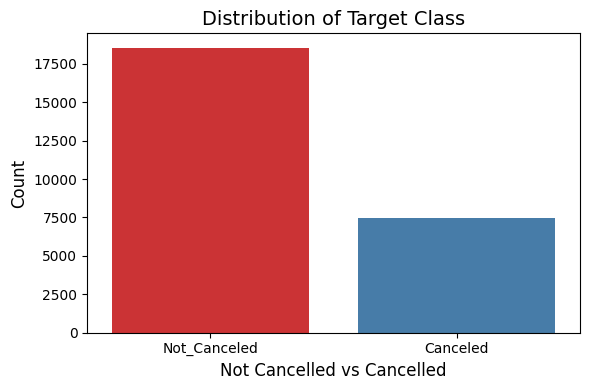

In [28]:
# Checking the target variable distribution

plt.figure(figsize = (6,4))
ax = sns.countplot(x = data['booking_status'], palette = "Set1")
plt.title("Distribution of Target Class", fontsize = 14)
plt.xlabel("Not Cancelled vs Cancelled", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.tight_layout()
plt.show()

**The target variable is highly imbalanced!**

## Exploratory Data Analysis

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

In [31]:
# Numerical and Categorical columns

numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']

categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print(f"We have {len(numerical_features)} numerical features : {numerical_features}")

print(f"We have {len(categorical_features)} numerical features : {categorical_features}")

We have 14 numerical features : ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
We have 4 numerical features : ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [ ]:
# Numerical and Categorical columns

categorical_cols = [
        'type_of_meal_plan','required_car_parking_space',
        'room_type_reserved','market_segment_type', 
        'repeated_guest','booking_status']

numerical_cols = [
        'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
        'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests']

In [33]:
# Proportion of count data on categorical features

for column in categorical_features:
    print(data[column].value_counts(normalize = True) * 100)
    print('---------------------------')

type_of_meal_plan
Meal Plan 1     78.453846
Not Selected    17.165385
Meal Plan 2      4.361538
Meal Plan 3      0.019231
Name: proportion, dtype: float64
---------------------------
room_type_reserved
Room_Type 1    71.692308
Room_Type 4    20.857692
Room_Type 6     3.626923
Room_Type 2     2.307692
Room_Type 5     0.892308
Room_Type 7     0.600000
Room_Type 3     0.023077
Name: proportion, dtype: float64
---------------------------
market_segment_type
Online           76.996154
Offline          15.815385
Corporate         5.430769
Complementary     1.373077
Aviation          0.384615
Name: proportion, dtype: float64
---------------------------
booking_status
Not_Canceled    71.376923
Canceled        28.623077
Name: proportion, dtype: float64
---------------------------


**Insights**

- `type_of_meal_plan` is highly biased towards Meal Plan 1, while Meal Plan 3 is rarely chosen.

- `room_type_reserved` is dominated by Room Type 1, with other room types contributing very little.

- `market_segment_type` shows strong preference for Online, with Aviation being negligible.

- `booking_status` indicates most bookings are not canceled, though cancellations are still significant (~29%).

In [34]:
data_copy = data.copy()

### Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [ ]:
def num_plot_dist(data, numerical_features):
    # Create subplots
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, len(numerical_features)*5))
    
    # Ensure axes is always a 2D array
    axes = np.array(axes).reshape(len(numerical_features), 2)
    
    for i, column in enumerate(numerical_features):
        # Histogram
        sns.histplot(data=data, x=column, ax=axes[i][0], kde=True, color="turquoise")
        axes[i][0].set_title(f"Histogram for {column}")
        
        # Boxplot
        sns.boxplot(data=data, x=column, ax=axes[i][1], color="tomato")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

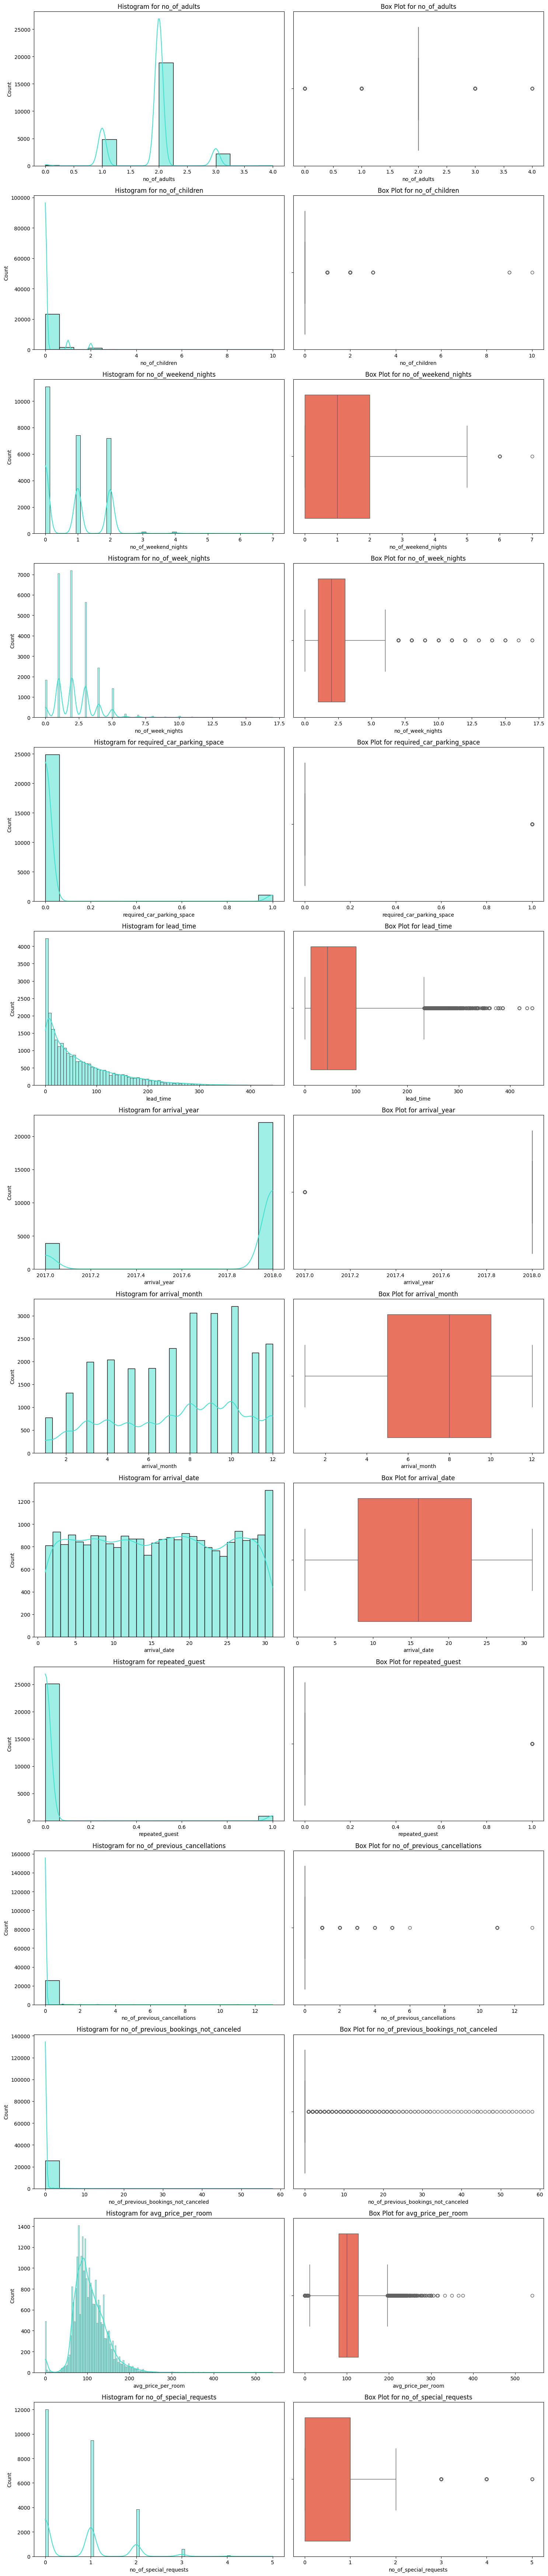

In [39]:
num_plot_dist(data , numerical_features = numerical_features)

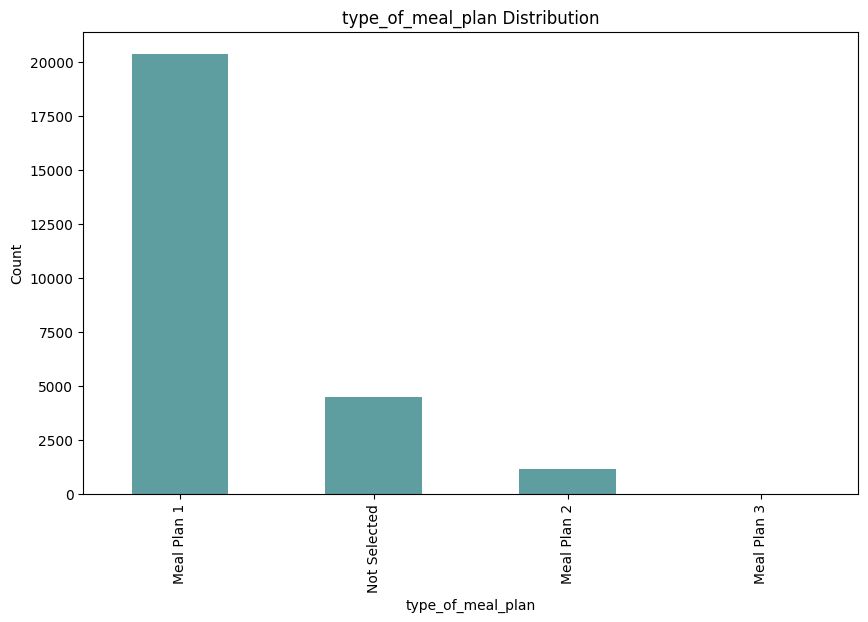

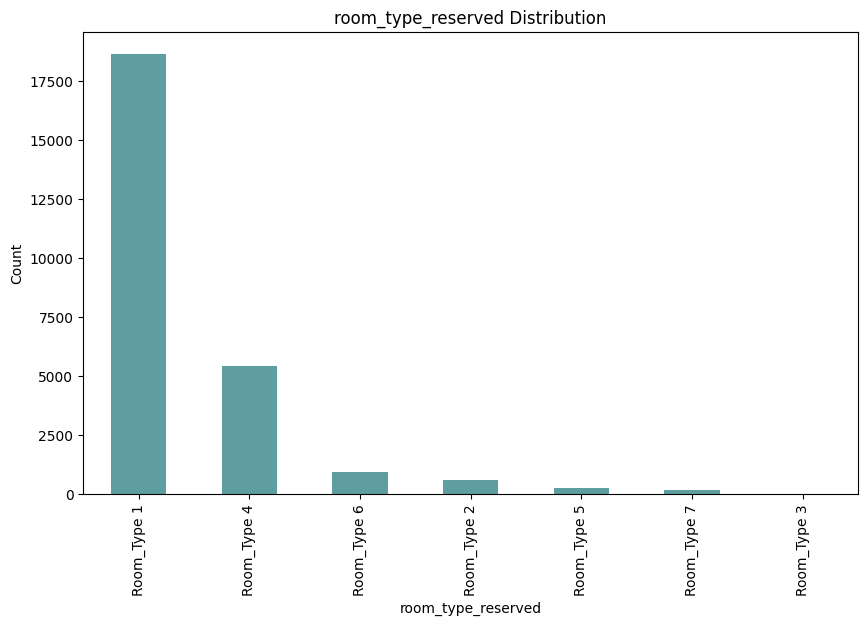

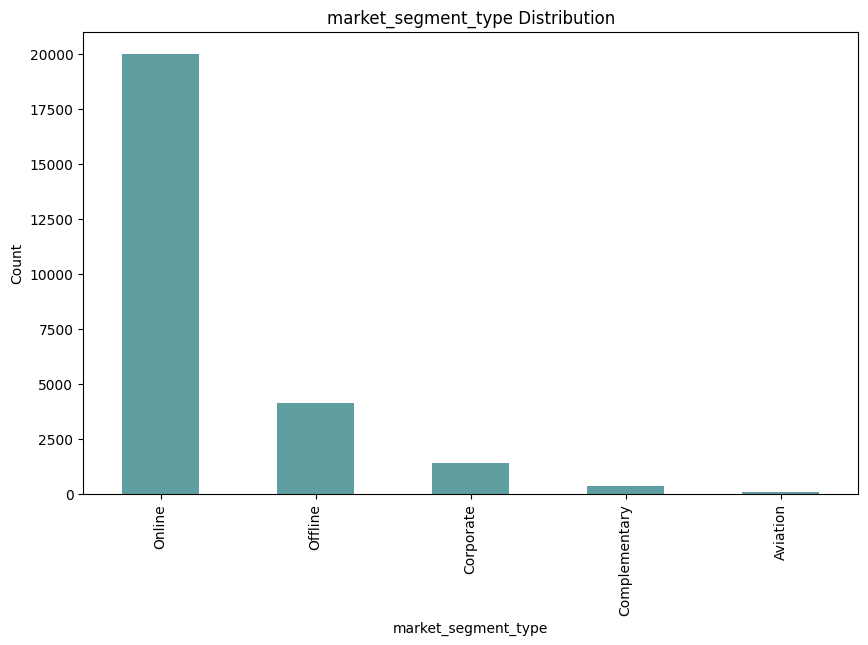

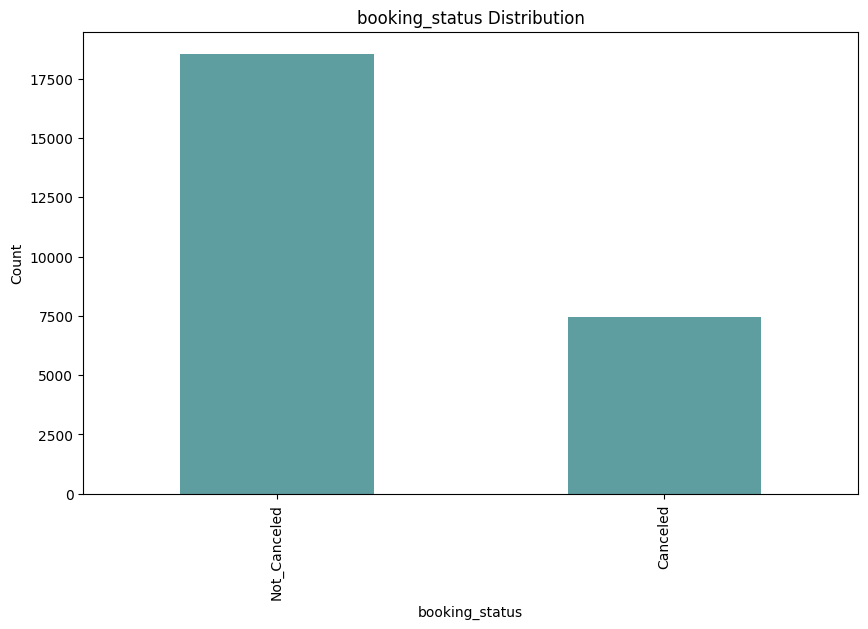

In [40]:
for cat_feature in categorical_features:
    plt.figure(figsize = (10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color = 'cadetblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

### Bivariate Analaysis

In [51]:
def plot_bivariate_numericals(data, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows , 2 , figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x = target, y = column,ax = axes[i] , data = data , palette = "Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

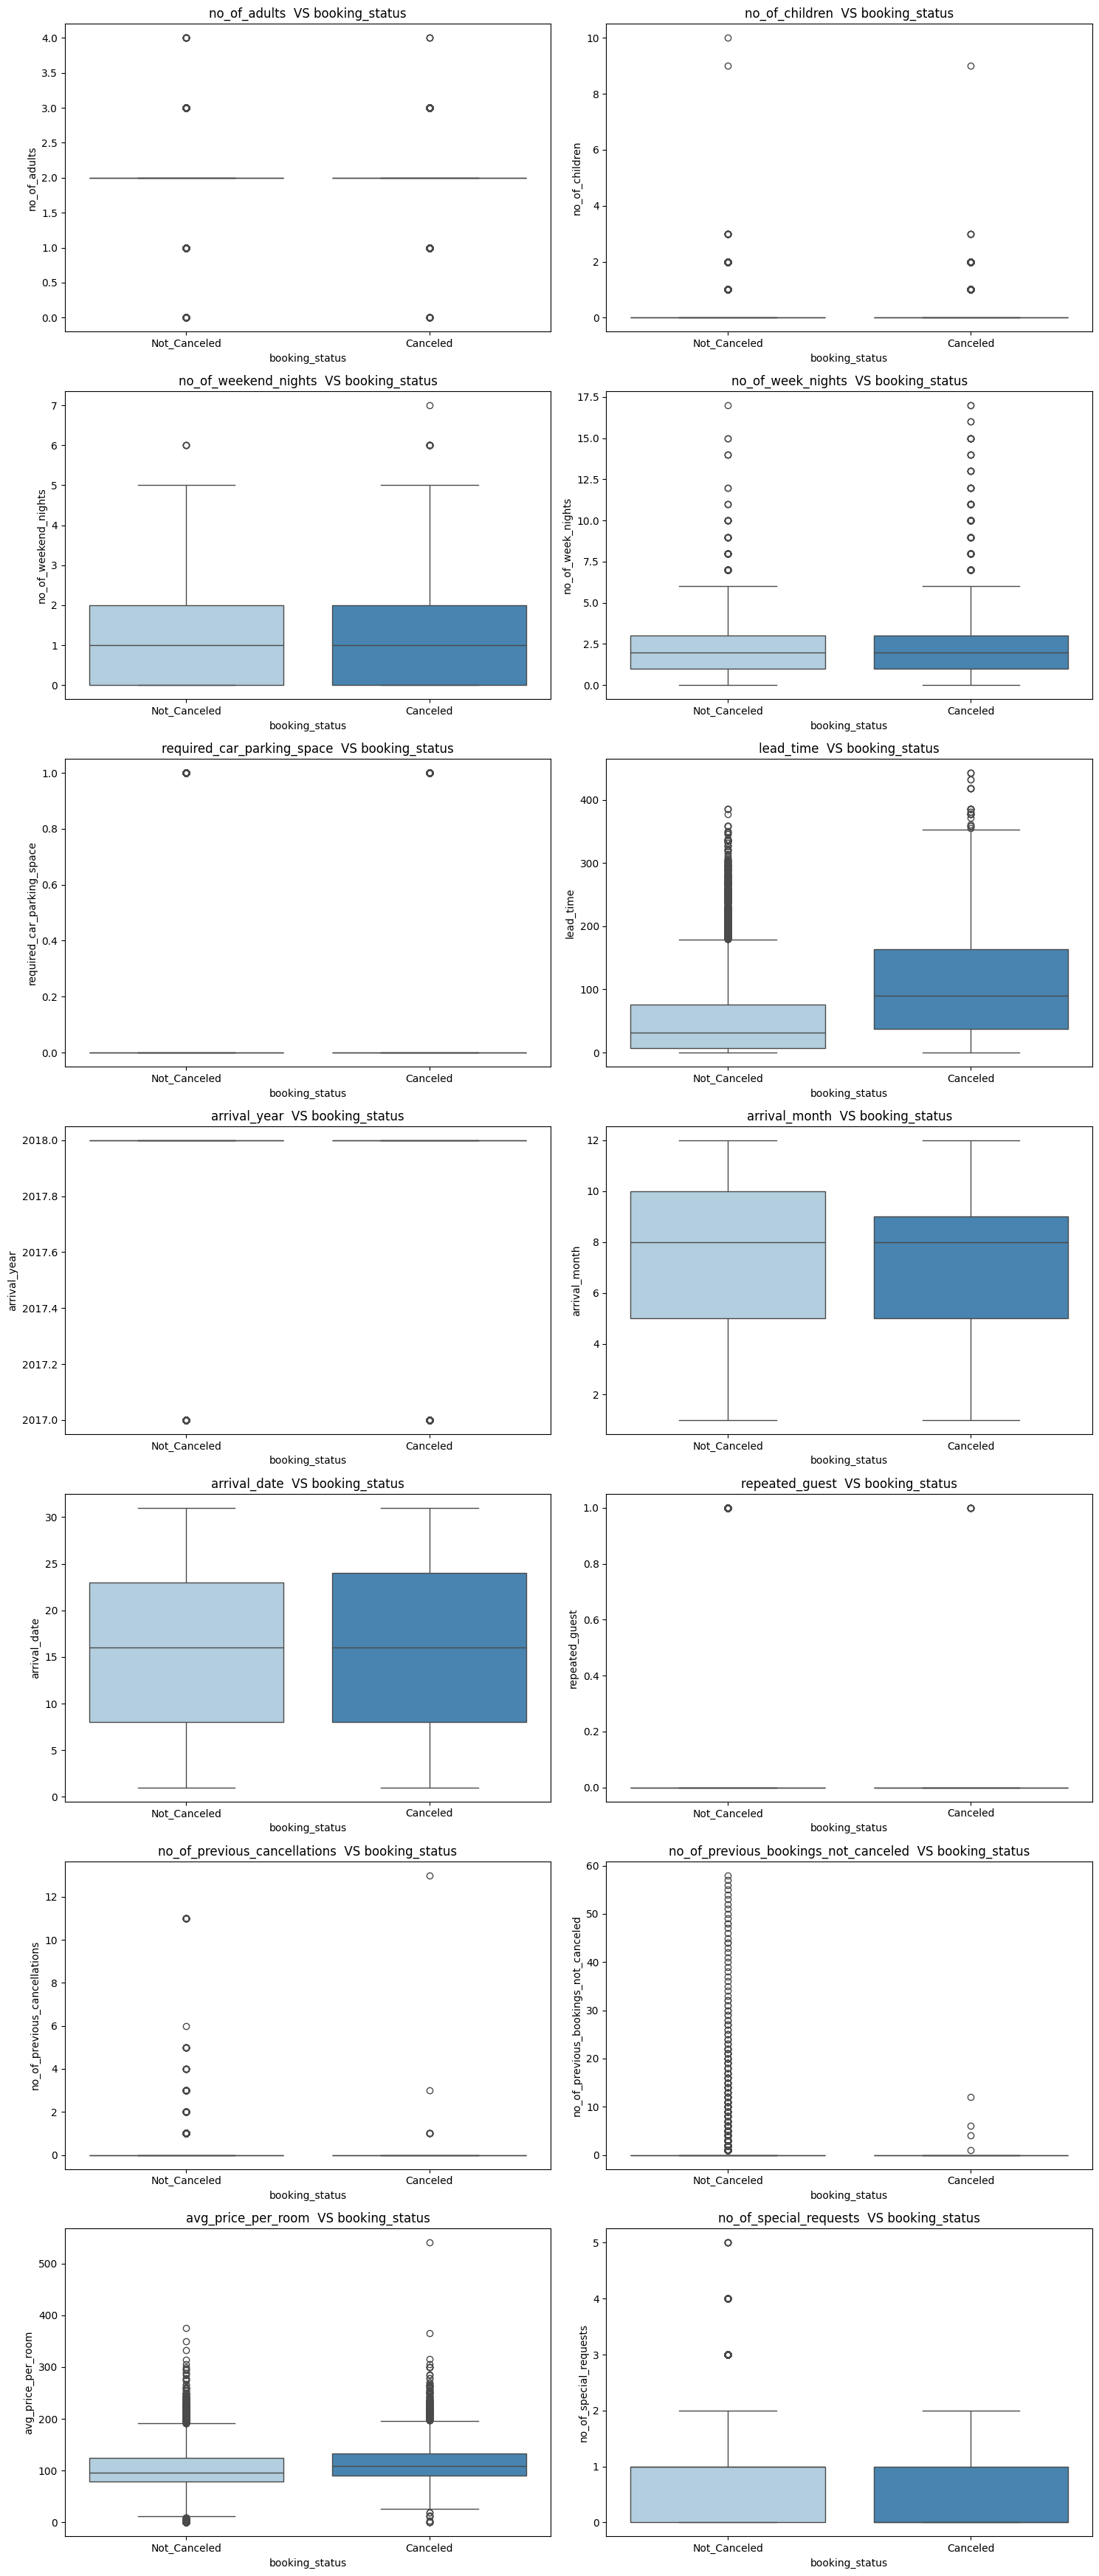

In [52]:
plot_bivariate_numericals(data, 'booking_status', numerical_features)

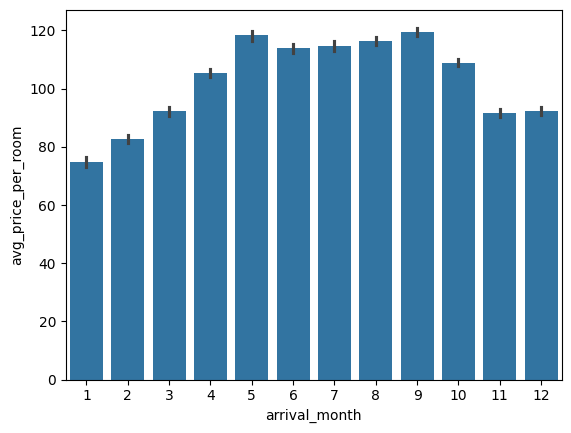

In [53]:
sns.barplot(x = 'arrival_month', y = "avg_price_per_room", data = data)
plt.show()

**We can see that as the number of customers increases, the average price per room also increase..**

In [54]:
def plot_bivaraite_categorical(data, target, categorical_features):

    num_features = len(categorical_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(categorical_features):
        sns.countplot(x = feature , hue = target ,data = data, palette = "Accent", ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis = 'x' , rotation = 90)

    plt.tight_layout()
    plt.show()

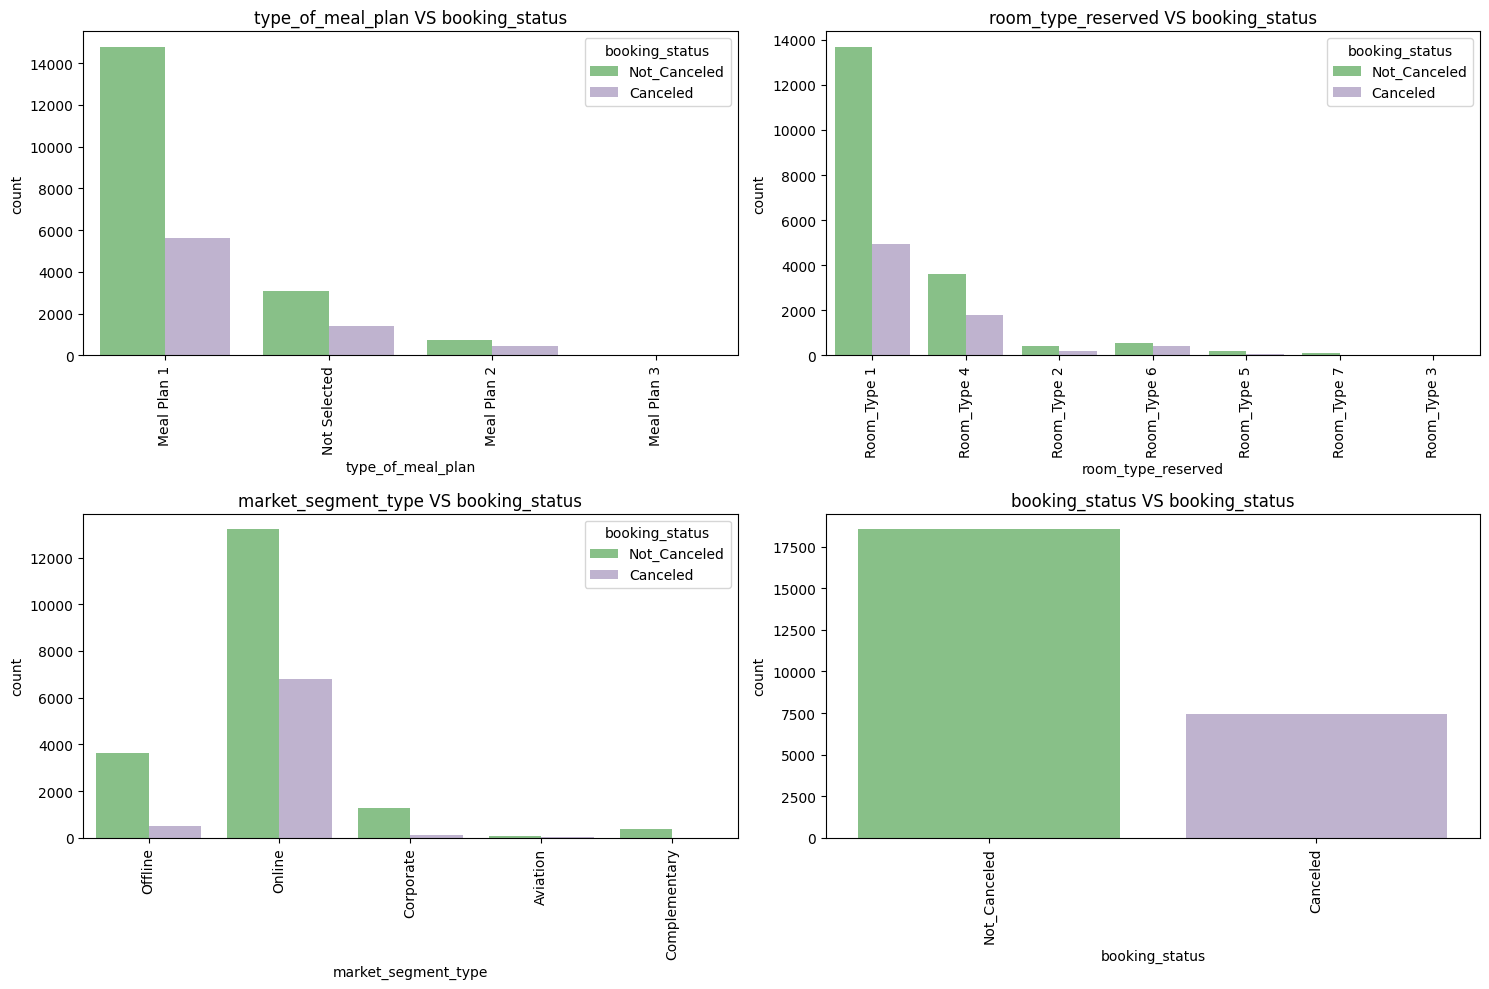

In [55]:
plot_bivaraite_categorical(data, 'booking_status', categorical_features)

## Feature Engineering

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

**We need to convert object datatypes into numerical**

In [59]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [60]:
mappings = {}

for col in categorical_features:
    data[col] = label_encoder.fit_transform(data[col])

    mappings[col] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [61]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [62]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  int64  
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  int64  
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

**All out categorical variables are now converted into numerical datatypes**

**We need to check for Multicollinearity, as it is essential to identify and address multicollinearity in regression models to ensure accurate and reliable results.**

In [64]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
X = add_constant(data)

vif_data = pd.DataFrame()

vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [66]:
vif_data

,Feature,VIF
0,const,4.129913e+07
1,no_of_adults,1.337855e+00
2,no_of_children,1.284896e+00
3,no_of_weekend_nights,1.077614e+00
4,no_of_week_nights,1.131223e+00
5,type_of_meal_plan,1.177405e+00
6,required_car_parking_space,1.032967e+00
7,room_type_reserved,1.555871e+00
8,lead_time,1.411162e+00
9,arrival_year,1.291251e+00


**If the VIF value is greater than 5, it indicates a high level of multicollinearity among the independent variables.**

**But as our VIF values are less than 5, we can conclude that there is no significant multicollinearity among the independent variables in our dataset.**

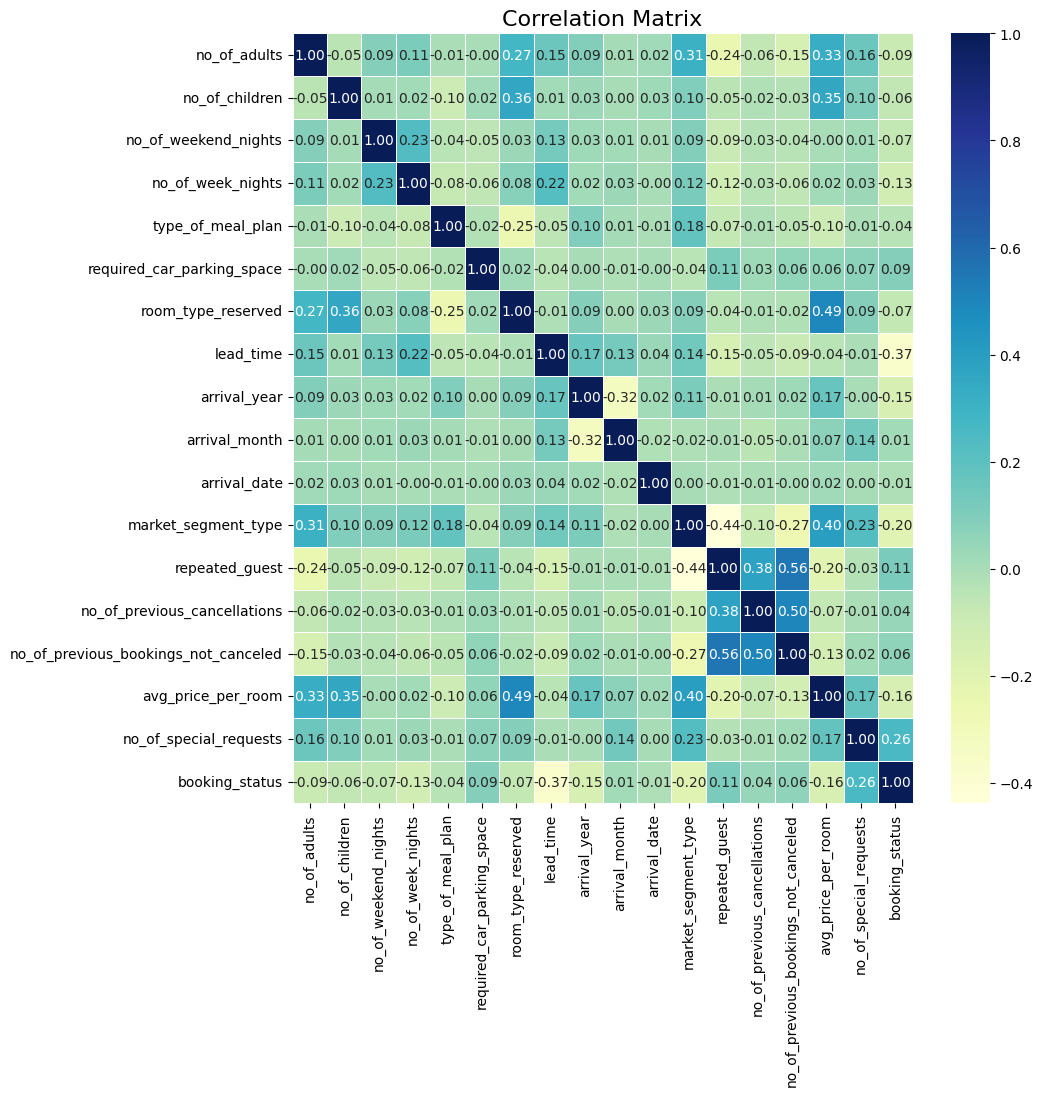

<Figure size 640x480 with 0 Axes>

In [67]:
# Creating correlationn Matrix

corr = data.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, linewidths = 0.5, annot = True, fmt = ".2f", cmap = "YlGnBu")
plt.title("Correlation Matrix", fontsize = 16)
plt.show()
plt.tight_layout()